In [ ]:
import pandas as pd
#import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [ ]:
df = pd.read_csv('winequality-red.csv')#import data set(wine quality red) use pandas to import it as df

In [ ]:
df.head()#to see dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.quality.value_counts() #for finding the count of each quality

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
df['pH'].unique() #unique ph in dataset

array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
       3.57, 3.61, 3.06, 3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.18, 3.02,
       3.55, 2.99, 3.01, 3.56, 3.03, 3.62, 2.88, 2.95, 2.98, 3.09, 2.86,
       3.74, 2.92, 3.72, 2.87, 2.89, 2.94, 3.66, 3.71, 3.78, 3.7 , 4.01,
       2.9 ])

In [ ]:
df.count() #getting the count of different features

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [ ]:
df.info()#concise summary of the data frame(datatype info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:

df.isnull().any() #checking for null value

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

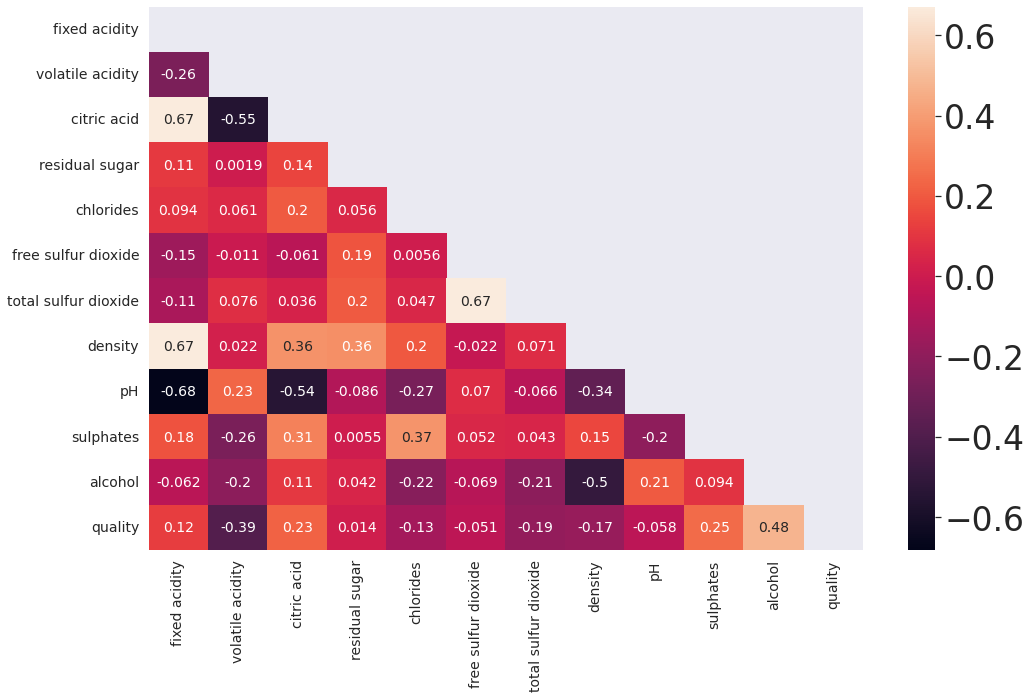

In [ ]:
#checking the relationship between all the features with the target (Quality)
zeromask = np.zeros_like(df.corr()) #creates an array of zeros
triangle_indices = np.triu_indices_from(zeromask)
zeromask[triangle_indices] = True

plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), mask=zeromask, annot=True, annot_kws={'size': 14})
sns.set_style('whitegrid')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

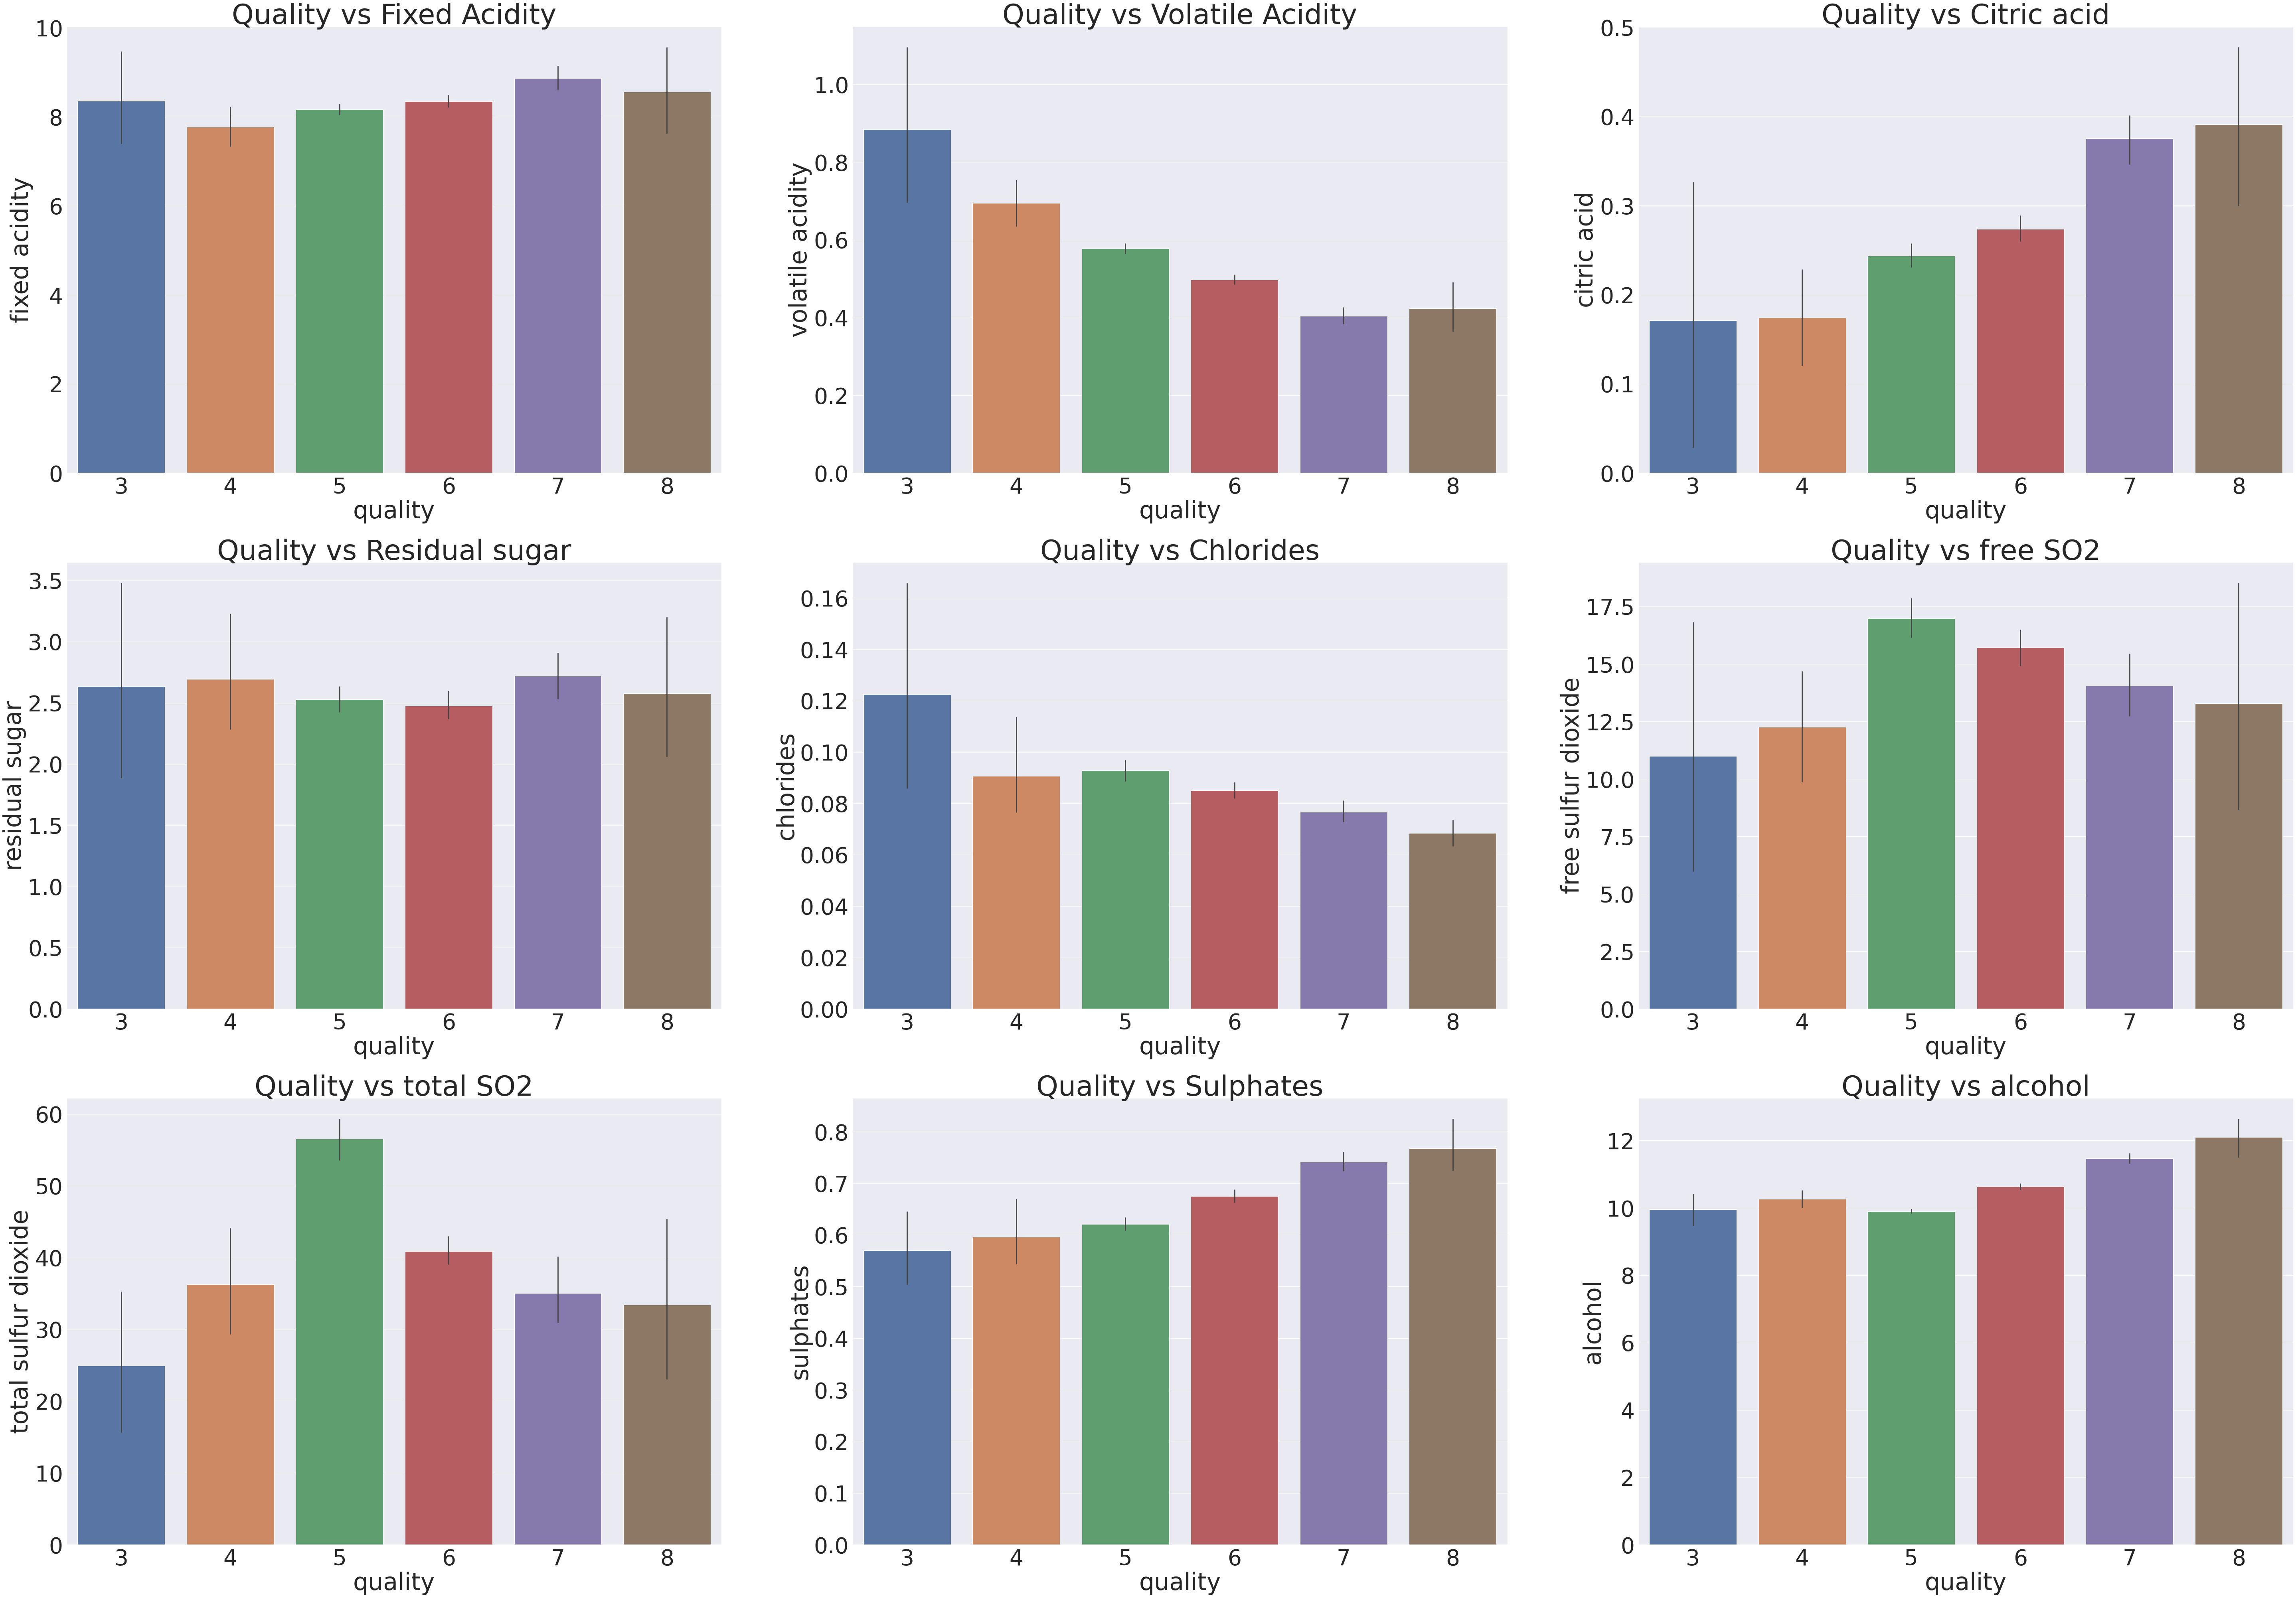

In [ ]:
plt.figure(figsize=(100,70))# plotting between quality and attributes of coloumns(total 9 plots)
sns.set(font_scale=5)
plt.subplot(331)      #no.of rows,no.of coloumns,third integer represent position of plot(left to right ,top-down fashion)
plt.title("Quality vs Fixed Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)# it is bar graph

plt.subplot(332)
plt.title("Quality vs Volatile Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)#for plotting we use data from df

plt.subplot(333)
plt.title("Quality vs Citric acid",fontsize=70)
sns.barplot(x = 'quality', y = 'citric acid', data = df)

plt.subplot(334)
plt.title("Quality vs Residual sugar",fontsize=70)
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

plt.subplot(335)
plt.title("Quality vs Chlorides",fontsize=70)
sns.barplot(x = 'quality', y = 'chlorides', data = df)

plt.subplot(336)
plt.title("Quality vs free SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

plt.subplot(337)
plt.title("Quality vs total SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

plt.subplot(338)
plt.title("Quality vs Sulphates",fontsize=70)
sns.barplot(x = 'quality', y = 'sulphates', data = df)

plt.subplot(339)
plt.title("Quality vs alcohol",fontsize=70)
sns.barplot(x = 'quality', y = 'alcohol', data = df)

In [ ]:
bins = (2, 6.5, 8)# categorizing quality into two using bins
classes = ['bad','good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = classes) # cut is used to create segments and sort values into bins the attribute is useful for going from continuous variable to categorial  variable

In [ ]:
label_quality = LabelEncoder()# classify these bins using classes and encoder

In [ ]:
df['quality'] = label_quality.fit_transform(df['quality']) # changing quality coloumn to encoded categories representing bad=0;good=1

In [ ]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


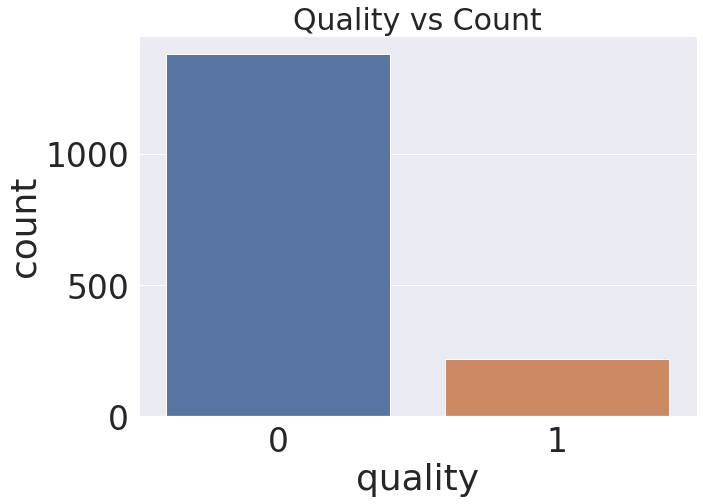

In [ ]:
plt.figure(figsize=(10,7))
sns.set(font_scale=3)
plt.title("Quality vs Count",fontsize=30)
sns.countplot(df['quality'])    #visualize count of each quality using c bond countplot

In [ ]:
df.head()# to see data frame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
X = df.drop('quality', axis = 1)
Y = df['quality'] # this will create two data Frames X will be the original data frame with quality target being removed and Y will contain the series df quality

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 21) #splitting data set into traing and testing data set (test size =20%)

In [ ]:
sc = StandardScaler() #standardize the data

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test) # classification is done using logistic regression and random forest classifier

In [ ]:
RF = RandomForestClassifier(n_estimators=100) # prediction as a group of trees will be more accurate than an individual tree(no.of trees =100)
RF.fit(X_train, Y_train) # training set and target variable of training set
pred_RF = RF.predict(X_test) # predict for testing dataset

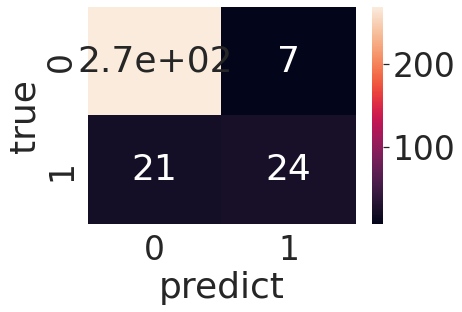

In [ ]:
cm1=confusion_matrix(Y_test, pred_RF) #calculating score using target variable and predicted target variable
ax1 = sns.heatmap(cm1,annot=True)  #annotation=true
ax1.set(xlabel='predict', ylabel='true')  #visualization done using heatmap true +ves,false +ves,true -ves,false -ves
plt.show() #true positive +ve has been predicted and come to be as true [false +ve(type 1 error), flase -ve (typr 2 error)]

In [ ]:
pred1 = accuracy_score(Y_test,pred_RF)
print('Random forest classifier accuracy level',pred1*100)

Random forest classifier accuracy level 91.25


In [ ]:
LR = LogisticRegression().fit(X_train,Y_train)  #logistic regression  is a ml algorithm used for classification of problems and is a predictive analysis on concept of probability

logistic regression accuracy score:  88.75


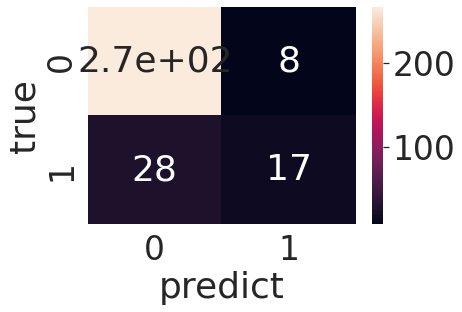

In [ ]:
pred_LR = LR.predict(X_test)
cm2 = confusion_matrix(Y_test,pred_LR)
ax2 = sns.heatmap(cm2,annot=True)
ax2.set(xlabel='predict', ylabel='true')
pred2 = accuracy_score(Y_test,pred_LR)
print("logistic regression accuracy score: ",pred2*100) #below one is confusion matrix 